**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [82]:
from __future__ import print_function, division
import pylab as pl
import os
import json
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels
import matplotlib.pyplot as plt
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
s = json.load( open("fbb_matplotlibrc.json") )
pl.rcParams.update(s)

In [129]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable (independent)
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.seed(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors
    


# STEP1:create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0.5,1,'Error Bars')

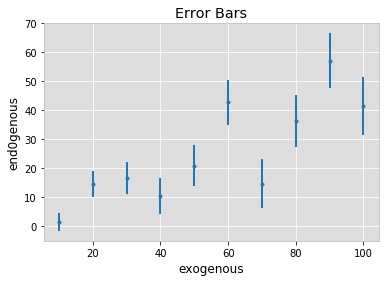

In [142]:
x = np.linspace(10, 100, 10)
slope = 1/2; intercept = 0
y = line(slope, x, intercept, errors=errors(x))
pl.errorbar(x=x, y=y, yerr=errors(x), fmt='.'); plt.ylabel('endogenous'); plt.xlabel('exogenous'); plt.title('Error Bars')  

Caption:[The error bars' sizes increase as the value of x increases]

# print y, x, and the result of applying statsmodels.api.add_constant() to x

# use statsmodels.api.OLS to fit x and y 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

print the model summary for each and discuss the differences

In [131]:
#THE WRONG WAY
smfit = smf.OLS(y, x).fit()
smfit.summary()

/anaconda3/envs/ads/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     83.21
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           7.65e-06
Time:                        13:55:48   Log-Likelihood:                -36.756
No. Observations:                  10   AIC:                             75.51
Df Residuals:                       9   BIC:                             75.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4680      0.051      9.122      0.000       0.352       0.584
==============================================================================
Omnibus:                        0.084   Durbin-Watson:                   2.796
Prob(Omnibus):                  0.959   Jarque-Bera (JB):                0.102
Skew:                           0.042   Prob(JB):                        0.950
Kurtosis:                       2.512   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [132]:
smfit.params

array([0.46803313])

In [133]:
#THE RIGHT WAY
right_model = smf.OLS(endog=y, exog=statsmodels.api.add_constant(x)).fit()
# data = pd.DataFrame(); data['y'] = pd.Series(y); data['x'] = pd.Series(x)
# right_model = smf.ols(formula='y ~ x', data=data).fit()
right_model.summary()

/anaconda3/envs/ads/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     16.54
Date:                Fri, 09 Nov 2018   Prob (F-statistic):            0.00360
Time:                        13:55:49   Log-Likelihood:                -36.750
No. Observations:                  10   AIC:                             77.50
Df Residuals:                       8   BIC:                             78.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6833      7.290     -0.094      0.928     -17.495      16.129
x1             0.4778      0.117      4.066      0.004       0.207       0.749
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   2.800
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.105
Skew:                          -0.001   Prob(JB):                        0.949
Kurtosis:                       2.498   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [134]:
print('y: ', y, '\nX: ', x)

y:  [ 1.5669346  14.46026443 16.54993707 10.47335575 20.90867838 42.79197241
 14.6969448  36.16368882 57.00972585 41.33259598] 
X:  [ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


In [135]:
right_model.params

array([-0.68325693,  0.47779394])

# plot the data (as points) and both statsmodels fits

Text(0.5,1,'Data and Statsmodel fits')

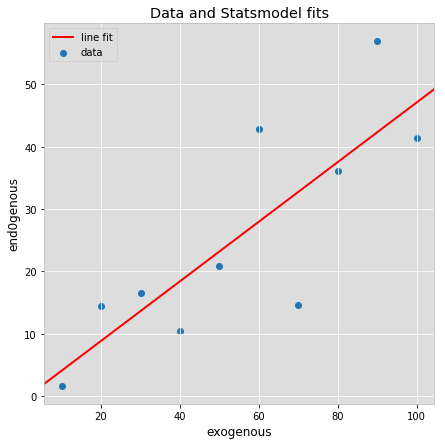

In [145]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y=y, x=x, label='data')
ax = statsmodels.graphics.regressionplots.abline_plot(model_results=right_model, ax=ax, color='r', label='line fit')
plt.legend(loc='upper left'); plt.ylabel('endogenous'); plt.xlabel('exogenous'); plt.title('Data and Statsmodel fits')

Caption:[The line describe the data farily well]

# create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0.5,1,'Error Bars')

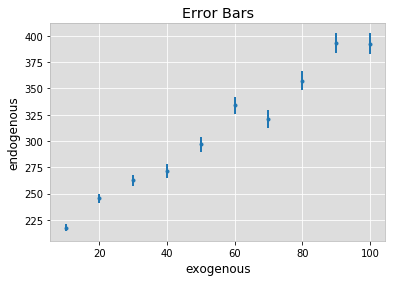

In [152]:
new_line = line(2, x, 201, errors=errors(x))
pl.errorbar(y=new_line, x=x, yerr=errors(x), fmt='.', label='error bars')  
plt.ylabel('endogenous'); plt.xlabel('exogenous'); plt.title('Error Bars') 

In [155]:
new_model = smf.OLS(new_line, statsmodels.api.add_constant(x)).fit()
new_model.summary()

/anaconda3/envs/ads/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     283.3
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           1.57e-07
Time:                        14:11:11   Log-Likelihood:                -36.750
No. Observations:                  10   AIC:                             77.50
Df Residuals:                       8   BIC:                             78.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        200.3167      7.290     27.477      0.000     183.505     217.129
x1             1.9778      0.117     16.833      0.000       1.707       2.249
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   2.800
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.105
Skew:                          -0.001   Prob(JB):                        0.949
Kurtosis:                       2.498   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Caption:[The error bars appear to be smaller]

Text(0.5,1,'Data and Statsmodel fits')

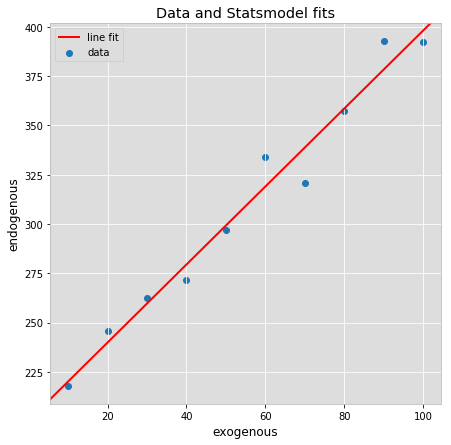

In [157]:
fig, ax = plt.subplots(figsize=(7,7))
ax.scatter(y=new_line, x=x, label='data')
ax = statsmodels.graphics.regressionplots.abline_plot(model_results=new_model, ax=ax, color='r', label='line fit')
plt.legend(loc='upper left'); plt.ylabel('endogenous'); plt.xlabel('exogenous'); plt.title('Data and Statsmodel fits')

Caption:[The model describes the data well]

Text(0.5,1,'Line with slope 2 and intercept 201 and its error bars')

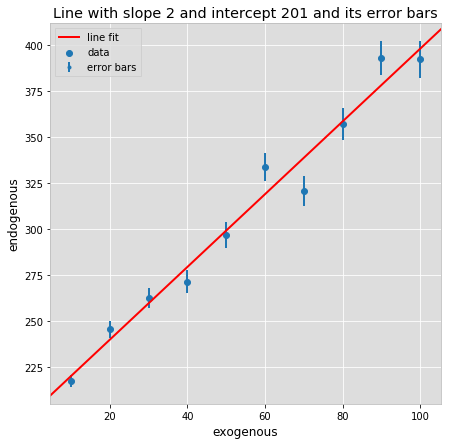

In [156]:
fig, ax = plt.subplots(figsize=(7,7))
ax.errorbar(y=new_line, x=x, yerr=errors(x), fmt='.', label='error bars')  
ax.scatter(y=new_line, x=x, label='data')
fig = statsmodels.graphics.regressionplots.abline_plot(model_results= new_model, ax=ax, color='r', label='line fit')
plt.legend(loc='upper left'); plt.ylabel('endogenous'); plt.xlabel('exogenous'); plt.title('Line with slope 2 and intercept 201 and its error bars')

Caption:[The model does not take the uncertainties into account]

# now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [162]:
weighted_model = smf.WLS(new_line, statsmodels.api.add_constant(x)).fit()
weighted_model.summary()

/anaconda3/envs/ads/lib/python3.7/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            WLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     283.3
Date:                Fri, 09 Nov 2018   Prob (F-statistic):           1.57e-07
Time:                        14:13:08   Log-Likelihood:                -36.750
No. Observations:                  10   AIC:                             77.50
Df Residuals:                       8   BIC:                             78.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        200.3167      7.290     27.477      0.000     183.505     217.129
x1             1.9778      0.117     16.833      0.000       1.707       2.249
==============================================================================
Omnibus:                        0.068   Durbin-Watson:                   2.800
Prob(Omnibus):                  0.967   Jarque-Bera (JB):                0.105
Skew:                          -0.001   Prob(JB):                        0.949
Kurtosis:                       2.498   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5,1,'Weightes line with slope 2 and intercept 201 and its error bars')

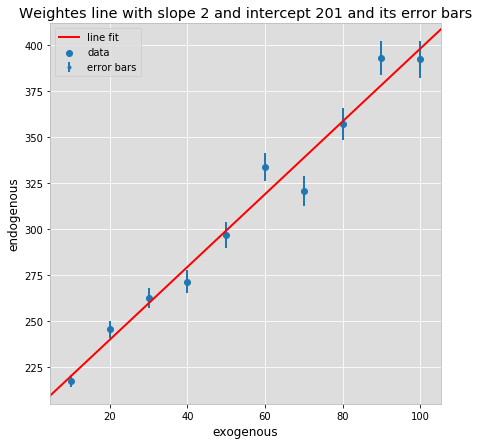

In [164]:
fig, ax = plt.subplots(figsize=(7,7))
ax.errorbar(y=new_line, x=x, yerr=errors(x), fmt='.', label='error bars')  
ax.scatter(y=new_line, x=x, label='data')
fig = statsmodels.graphics.regressionplots.abline_plot(model_results= weighted_model, ax=ax, color='r', label='line fit')
plt.legend(loc='upper left'); plt.ylabel('endogenous'); plt.xlabel('exogenous'); plt.title('Weightes line with slope 2 and intercept 201 and its error bars')